## import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import pandas as pd

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN
import keras_costum_metric.Balanced_accuracy as ba
import keras_costum_metric.F1metric_keras as f1
import keras_custom_callback.Early_Stop_AccLoss as Stop_AL
import keras_custom_callback.Checkpoint_best_auc as Checkpoint_A


import Set_model as model
import plot

## dataset 

In [17]:
# Load the dataset
credit_df=pd.read_csv("..\\data\\german_credit.csv")
pd.set_option('display.max_columns', None)
credit_df.head(10)

Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   
5              1                1                          10   
6              1                1                           8   
7              1                1                           6   
8              1                4                          18   
9              1                2                          24   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   
5                                  4        0           2241   
6                                  4        0           3398   
7                                  4        0           1361   
8                                  4        3           1098   
9                                  2        3           3758   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             2                    4   
1                     1                             3                    2   
2                     2                             4                    2   
3                     1                             3                    3   
4                     1                             3                    4   
5                     1                             2                    1   
6                     1                             4                    1   
7                     1                             2                    2   
8                     1                             1                    4   
9                     3                             1                    1   

   Sex & Marital Status  Guarantors  Duration in Current address  \
0                     2           1                            4   
1                     3           1                            2   
2                     2           1                            4   
3                     3           1                            2   
4                     3           1                            4   
5                     3           1                            3   
6                     3           1                            4   
7                     3           1                            4   
8                     2           1                            4   
9                     2           1                            4   

   Most valuable available asset  Age (years)  Concurrent Credits  \
0                              2           21                   3   
1                              1           36                   3   
2                              1           23                   3   
3                              1           39                   3   
4                              2           38                   1   
5                              1           48                   3   
6                              1           39                   3   
7                              1           40                   3   
8                              3           65                   3   
9                              4           23                   3   

   Type of apartment  No of Credits at this Bank  Occupation  \
0                  1                           1           3   
1                  1                           2           3   
2                  1  

In [18]:
X = credit_df.drop(columns=['Creditability'])
Y = credit_df['Creditability']

In [19]:
np.shape(X)


(1000, 20)

In [20]:
np.shape(Y)

(1000,)

In [21]:
scaler = MinMaxScaler()
scaler.fit(X)
t_X = scaler.transform(X)

In [22]:
print(t_X)

[[0.         0.20588235 1.         ... 0.         0.         0.        ]
 [0.         0.07352941 1.         ... 1.         0.         0.        ]
 [0.33333333 0.11764706 0.5        ... 0.         0.         0.        ]
 ...
 [1.         0.25       1.         ... 0.         1.         0.        ]
 [0.33333333 0.11764706 0.5        ... 0.         1.         0.        ]
 [0.         0.38235294 0.5        ... 0.         0.         0.        ]]


In [23]:
Y = np.array(Y)

## optimizer

In [24]:
# adam = keras.optimizers.Adam(learning_rate=0.0001)

In [25]:
loss = keras.losses.BinaryCrossentropy()

## metrics

In [26]:
metrics=['accuracy', keras.metrics.Precision(), ba.BalancedAccuracy() , f1.F1Score(), keras.metrics.AUC(name='auc')]

## model

In [27]:
# model1 = model.model1(optimizer= adam, metric = metrics)

In [28]:
# model1.summary()

## kfold

In [29]:
# kf = KFold(n_splits=10, shuffle=True, random_state=42)


# # Initialize metrics lists
# accuracies = []
# precisions = []
# # recalls = []
# f1_scores = []
# roc_aucs = []
# # true_negatives = []
# balance_accuracies = []


# # Perform KFold cross-validation
# for train_index, test_index in kf.split(t_X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     adam = keras.optimizers.Adam(learning_rate=0.0001)
#     model1 = model.model1(optimizer= adam, metric = metrics)
    
#     history = model1.fit(X_train, y_train, epochs=100, validation_split=0.1)

#     # print(history.history.keys())

#     loss_and_metrics = model1.evaluate(X_test, y_test)
#     print(loss_and_metrics)
#     print('Loss = ',loss_and_metrics[0])
#     accuracies.append(loss_and_metrics[1])
#     precisions.append(loss_and_metrics[2])
#     # recalls.append(loss_and_metrics[3])
#     balance_accuracies.append(loss_and_metrics[3])
#     f1_scores.append(loss_and_metrics[4])
#     roc_aucs.append(loss_and_metrics[5])
#     # true_negatives.append(loss_and_metrics[6])
    

#     plot.plotAccuracy(history)
    
#     plot.plotLoss(history)

#     plot.plotConfusionMatrix(model= model1, X_test=X_test, y_test=y_test)


# # Calculate the average of the metrics
# average_accuracy = np.mean(accuracies)
# average_precision = np.mean(precisions)
# # average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies)
# average_f1_score = np.mean(f1_scores)
# average_roc_auc = np.mean(roc_aucs)
# # average_true_negative = np.mean(true_negatives)


# # Display the metrics
# print(f"Average Accuracy: {average_accuracy}")
# print("Standard Deviation of CV accuracy: ", np.std(accuracies))
# print(f"Average Precision: {average_precision}")
# print("Standard Deviation of CV precision: ", np.std(precisions))
# # print(f"Average Recall: {average_recall}")
# # print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV recall: ", np.std(balance_accuracies))
# print(f"Average F1-Score: {average_f1_score}")
# print("Standard Deviation of CV F1: ", np.std(f1_scores))
# print(f"Average ROC-AUC: {average_roc_auc}")
# print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs))
# # print(f"Average true negative: {average_true_negative}")
# # print("Standard Deviation of CV true_negative: ", np.std(true_negatives))


Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4688 - auc: 0.5371 - balanced_accuracy: 0.5000 - f1_score: 0.6383 - loss: 1.0237 - precision_1: 0.4839
Epoch 1: val_loss improved from inf to 0.92696, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5136 - auc: 0.5252 - balanced_accuracy: 0.4963 - f1_score: 0.6554 - loss: 1.0166 - precision_1: 0.5203 - val_accuracy: 0.6778 - val_auc: 0.5430 - val_balanced_accuracy: 0.5026 - val_f1_score: 0.6648 - val_loss: 0.9270 - val_precision_1: 0.7024
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4688 - auc: 0.3706 - balanced_accuracy: 0.5000 - f1_score: 0.6737 - loss: 1.0883 - precision_1: 0.4643
Epoch 2: val_loss improved from 0.92696 to 0.92530, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5121 - auc: 0.4955 - balanced_accuracy: 0.4993 - f1_score: 0.6699 - loss: 1.0215 - precision_1: 0.5129 - val_accuracy: 0.6722 - 

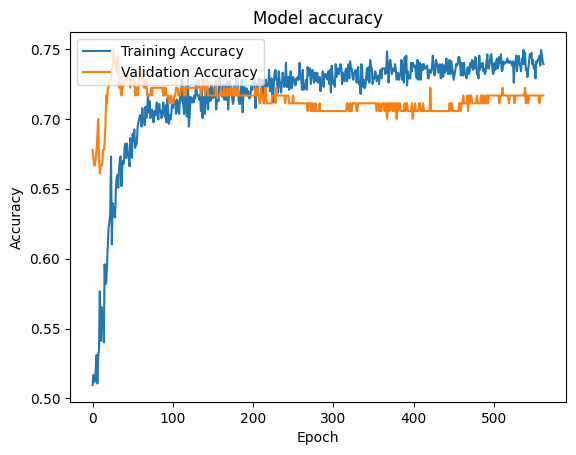

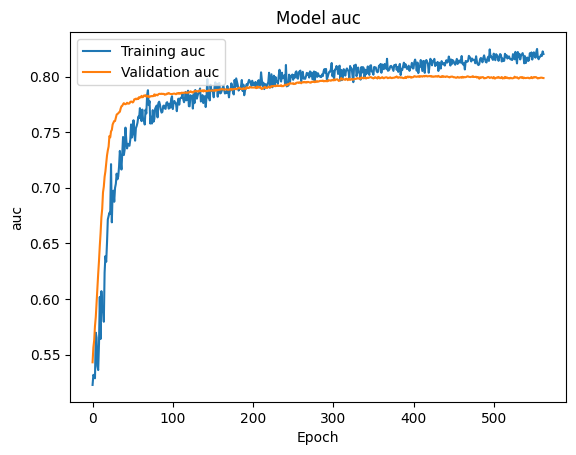

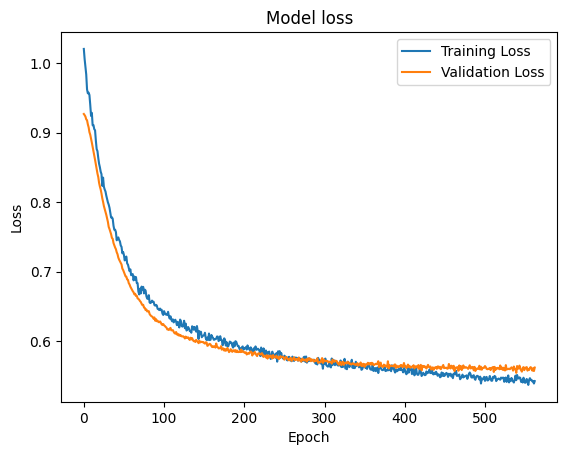

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


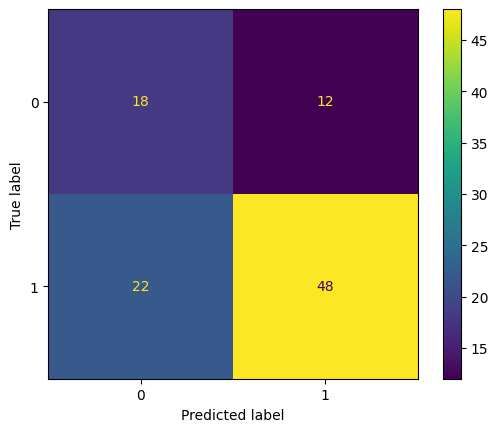

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4688 - auc: 0.7500 - balanced_accuracy: 0.4797 - f1_score: 0.7358 - loss: 1.0230 - precision_1: 0.7812
Epoch 1: val_loss improved from inf to 0.94881, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5100 - auc: 0.6135 - balanced_accuracy: 0.4834 - f1_score: 0.7357 - loss: 0.9987 - precision_1: 0.6049 - val_accuracy: 0.7111 - val_auc: 0.5951 - val_balanced_accuracy: 0.4981 - val_f1_score: 0.7356 - val_loss: 0.9488 - val_precision_1: 0.7102
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4062 - auc: 0.3644 - balanced_accuracy: 0.5000 - f1_score: 0.7356 - loss: 0.9960 - precision_1: 0.5000
Epoch 2: val_loss improved from 0.94881 to 0.94011, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5221 - auc: 0.5013 - balanced_accuracy: 0.4966 - f1_score: 0.7355 - loss: 0.9857 - precision_1: 0.5443 - val_accuracy: 0.7056 - 

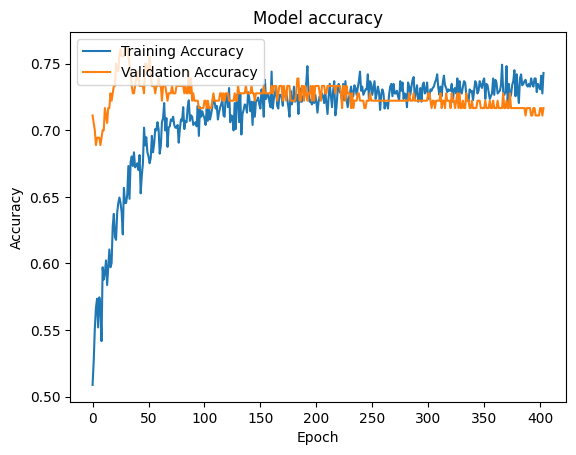

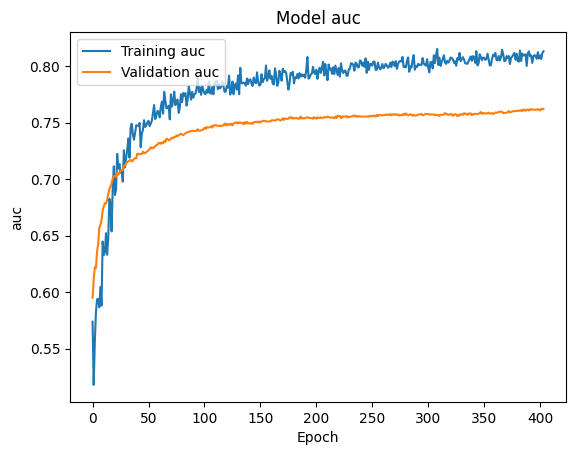

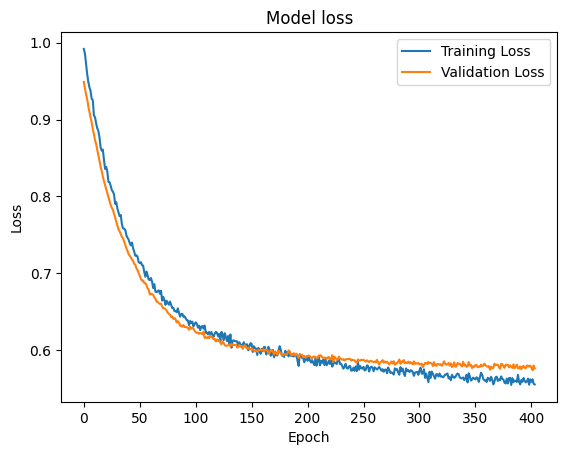

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


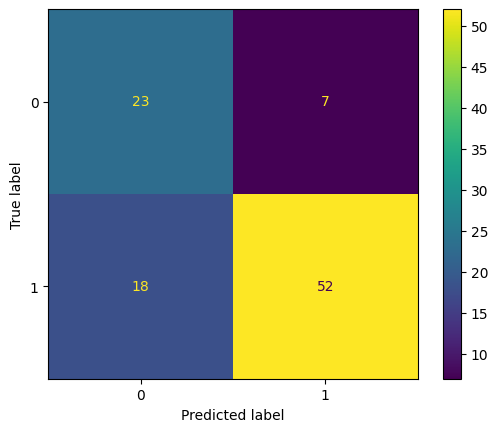

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.3750 - auc: 0.7278 - balanced_accuracy: 0.5142 - f1_score: 0.7380 - loss: 1.1411 - precision_1: 0.8099
Epoch 1: val_loss improved from inf to 1.06811, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4808 - auc: 0.5989 - balanced_accuracy: 0.5340 - f1_score: 0.7379 - loss: 1.0540 - precision_1: 0.7049 - val_accuracy: 0.3167 - val_auc: 0.5328 - val_balanced_accuracy: 0.5023 - val_f1_score: 0.7377 - val_loss: 1.0681 - val_precision_1: 0.8000
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - auc: 0.6862 - balanced_accuracy: 0.5000 - f1_score: 0.7376 - loss: 0.9963 - precision_1: 1.0000
Epoch 2: val_loss improved from 1.06811 to 1.03588, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4968 - auc: 0.5131 - balanced_accuracy: 0.4978 - f1_score: 0.7376 - loss: 1.0245 - precision_1: 0.5656 - val_accuracy: 0.3611 - 

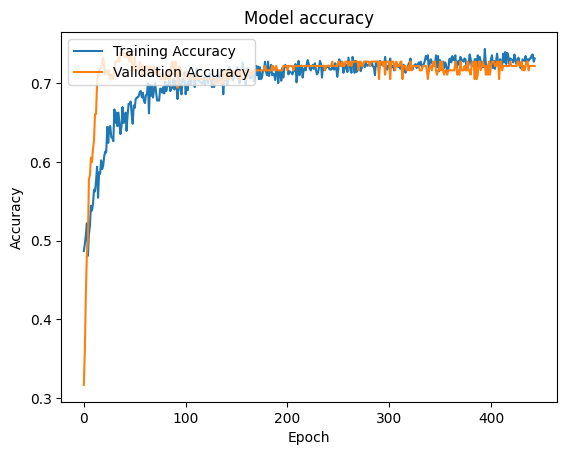

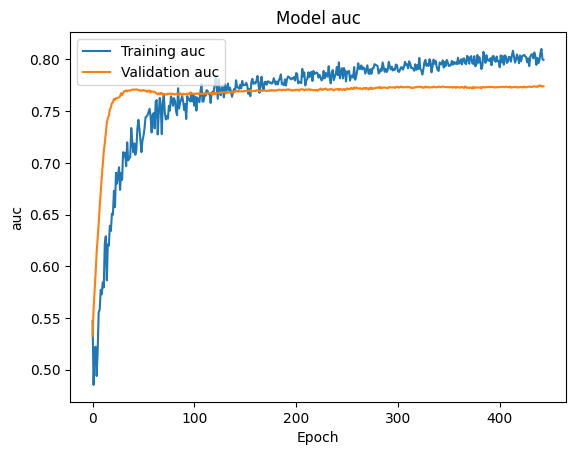

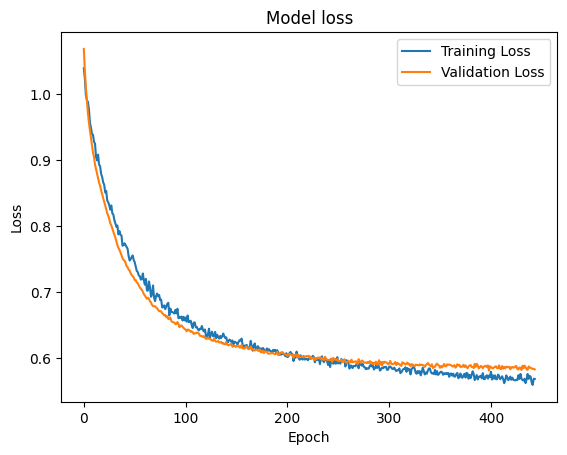

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


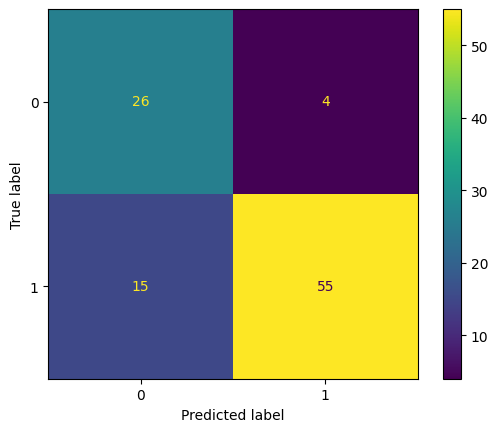

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5625 - auc: 0.7575 - balanced_accuracy: 0.5101 - f1_score: 0.7330 - loss: 0.9996 - precision_1: 0.8319
Epoch 1: val_loss improved from inf to 0.97809, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5261 - auc: 0.6422 - balanced_accuracy: 0.5047 - f1_score: 0.7329 - loss: 0.9956 - precision_1: 0.6656 - val_accuracy: 0.5333 - val_auc: 0.5834 - val_balanced_accuracy: 0.4968 - val_f1_score: 0.7328 - val_loss: 0.9781 - val_precision_1: 0.7283
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6875 - auc: 0.7510 - balanced_accuracy: 0.5000 - f1_score: 0.7328 - loss: 0.9515 - precision_1: 0.6667
Epoch 2: val_loss improved from 0.97809 to 0.96489, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5305 - auc: 0.5502 - balanced_accuracy: 0.5033 - f1_score: 0.7328 - loss: 0.9880 - precision_1: 0.5522 - val_accuracy: 0.5667 - 

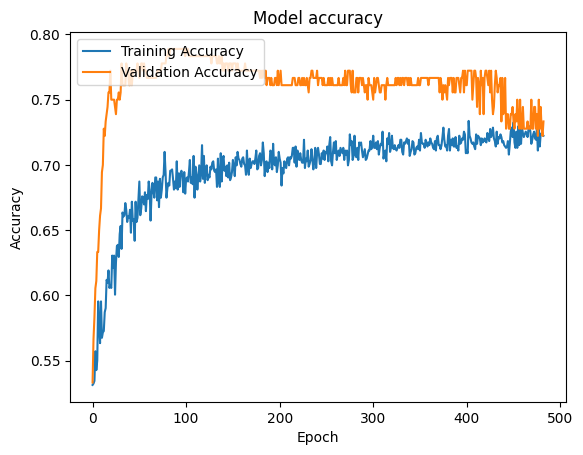

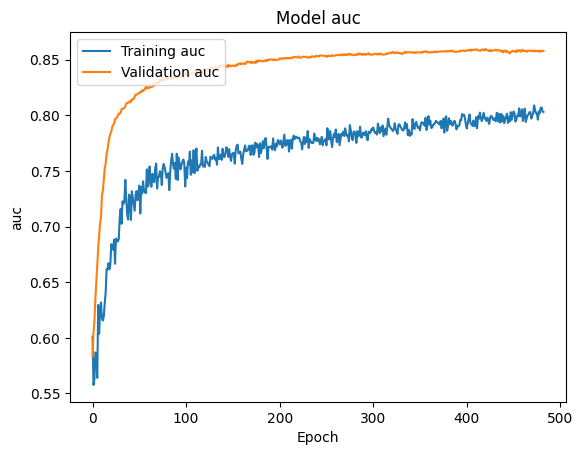

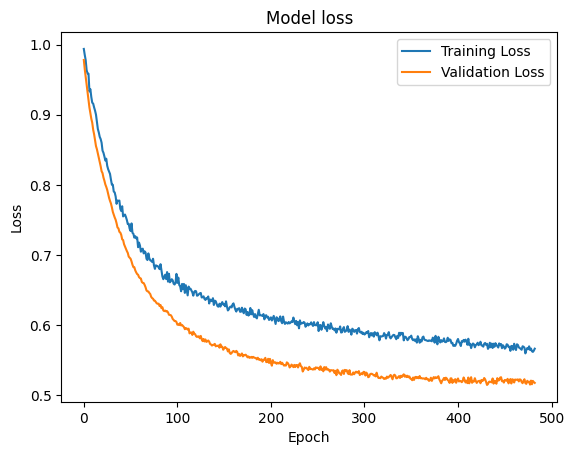

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


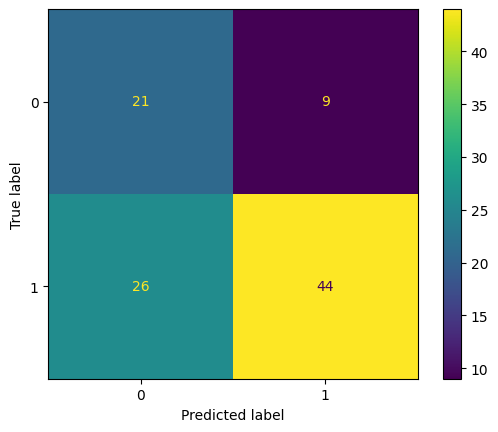

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4062 - auc: 0.7946 - balanced_accuracy: 0.5011 - f1_score: 0.7327 - loss: 1.0772 - precision_1: 0.7823
Epoch 1: val_loss improved from inf to 0.97060, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4865 - auc: 0.6168 - balanced_accuracy: 0.5018 - f1_score: 0.7327 - loss: 1.0205 - precision_1: 0.6316 - val_accuracy: 0.5722 - val_auc: 0.5218 - val_balanced_accuracy: 0.5073 - val_f1_score: 0.7326 - val_loss: 0.9706 - val_precision_1: 0.7094
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - auc: 0.5196 - balanced_accuracy: 0.5000 - f1_score: 0.7326 - loss: 1.0061 - precision_1: 0.4706
Epoch 2: val_loss improved from 0.97060 to 0.96402, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5413 - auc: 0.5488 - balanced_accuracy: 0.5024 - f1_score: 0.7326 - loss: 0.9901 - precision_1: 0.5474 - val_accuracy: 0.5667 - 

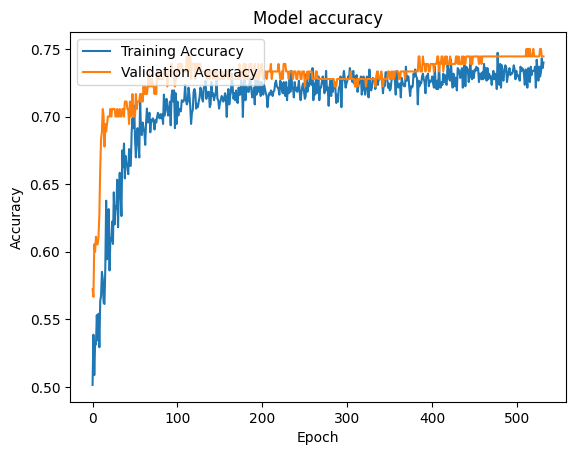

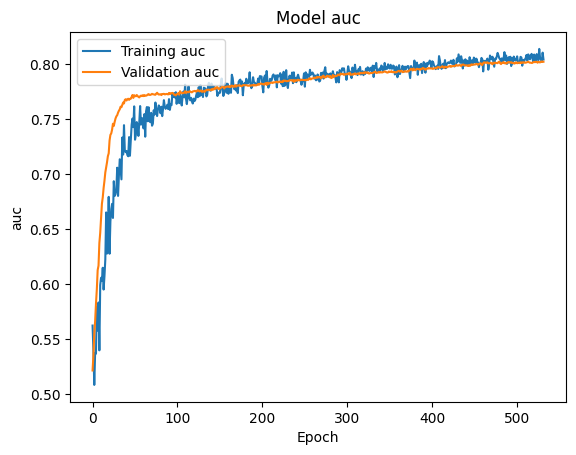

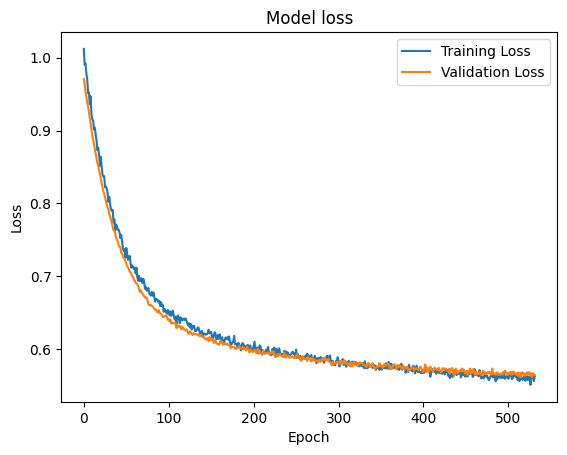

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


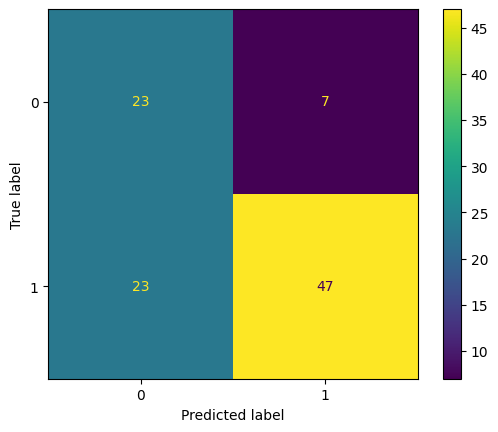

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3750 - auc: 0.7401 - balanced_accuracy: 0.4716 - f1_score: 0.7343 - loss: 1.1047 - precision_1: 0.7552
Epoch 1: val_loss improved from inf to 0.90684, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4862 - auc: 0.6238 - balanced_accuracy: 0.4736 - f1_score: 0.7343 - loss: 1.0463 - precision_1: 0.5819 - val_accuracy: 0.7000 - val_auc: 0.6377 - val_balanced_accuracy: 0.5000 - val_f1_score: 0.7342 - val_loss: 0.9068 - val_precision_1: 0.7000
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5312 - auc: 0.6647 - balanced_accuracy: 0.5000 - f1_score: 0.7342 - loss: 1.0012 - precision_1: 0.5000
Epoch 2: val_loss improved from 0.90684 to 0.90468, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5254 - auc: 0.5796 - balanced_accuracy: 0.5012 - f1_score: 0.7342 - loss: 1.0010 - precision_1: 0.5285 - val_accuracy: 0.7000 - 

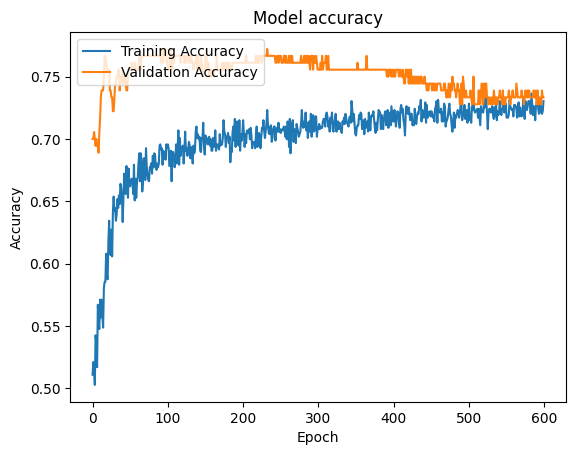

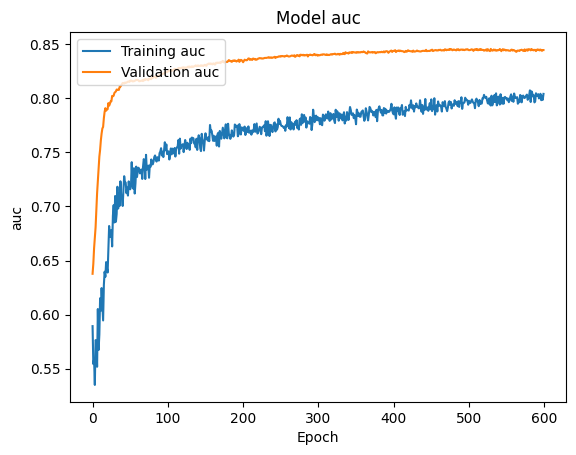

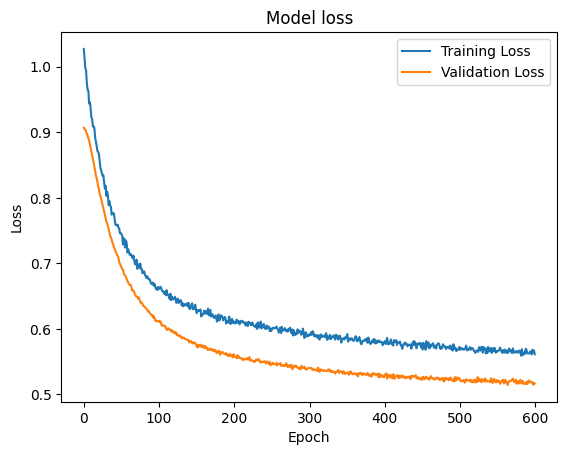

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


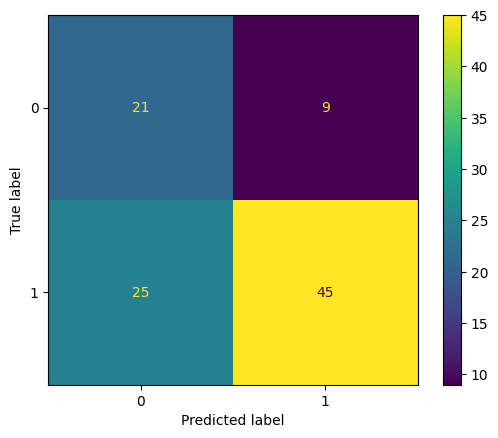

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5312 - auc: 0.7716 - balanced_accuracy: 0.4907 - f1_score: 0.7333 - loss: 1.0951 - precision_1: 0.7899
Epoch 1: val_loss improved from inf to 0.88644, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4869 - auc: 0.6001 - balanced_accuracy: 0.4707 - f1_score: 0.7333 - loss: 1.1221 - precision_1: 0.5757 - val_accuracy: 0.7000 - val_auc: 0.6336 - val_balanced_accuracy: 0.5000 - val_f1_score: 0.7333 - val_loss: 0.8864 - val_precision_1: 0.7000
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - auc: 0.3555 - balanced_accuracy: 0.5000 - f1_score: 0.7333 - loss: 1.1002 - precision_1: 0.5000
Epoch 2: val_loss improved from 0.88644 to 0.88201, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5065 - auc: 0.5504 - balanced_accuracy: 0.5000 - f1_score: 0.7333 - loss: 1.0662 - precision_1: 0.5065 - val_accuracy: 0.7000 - 

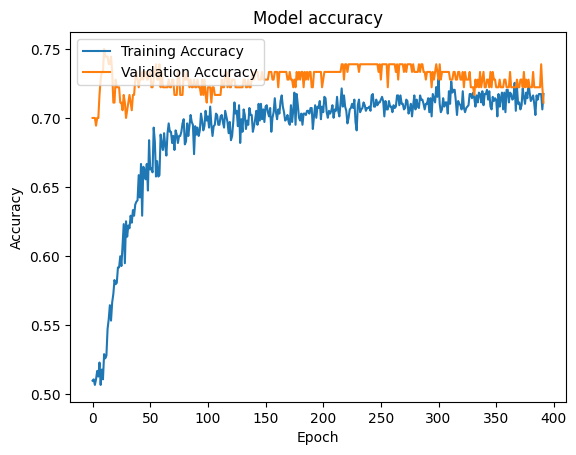

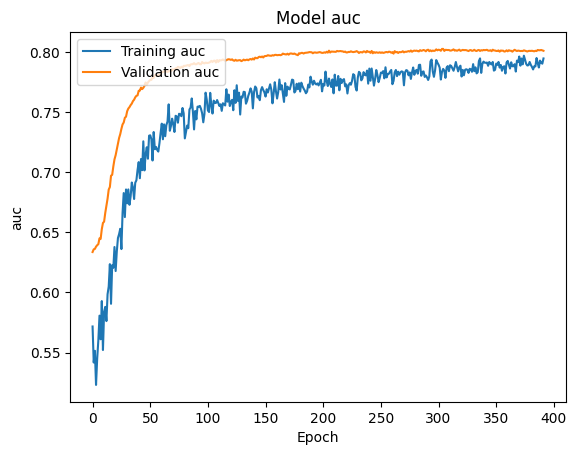

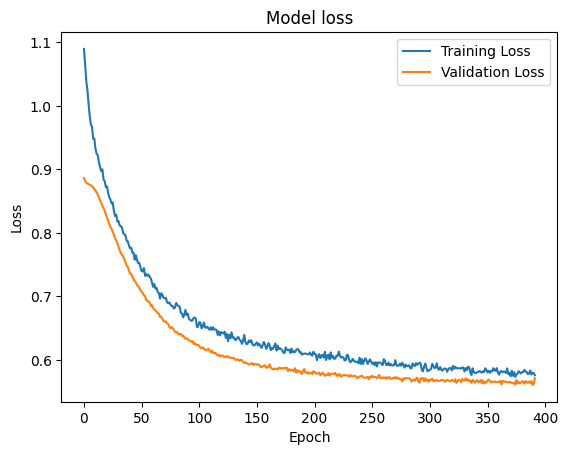

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


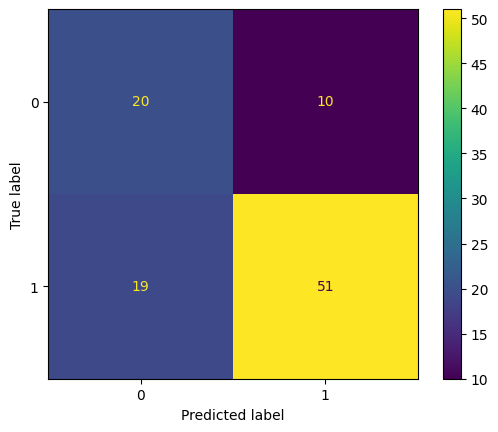

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4688 - auc: 0.7653 - balanced_accuracy: 0.5045 - f1_score: 0.7319 - loss: 1.0397 - precision_1: 0.8348
Epoch 1: val_loss improved from inf to 0.98562, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4968 - auc: 0.6198 - balanced_accuracy: 0.5074 - f1_score: 0.7319 - loss: 1.0079 - precision_1: 0.6486 - val_accuracy: 0.4944 - val_auc: 0.5705 - val_balanced_accuracy: 0.5073 - val_f1_score: 0.7318 - val_loss: 0.9856 - val_precision_1: 0.7215
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5625 - auc: 0.5496 - balanced_accuracy: 0.5000 - f1_score: 0.7318 - loss: 0.9894 - precision_1: 0.5000
Epoch 2: val_loss improved from 0.98562 to 0.96900, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5102 - auc: 0.5208 - balanced_accuracy: 0.4949 - f1_score: 0.7318 - loss: 0.9967 - precision_1: 0.5251 - val_accuracy: 0.5889 - 

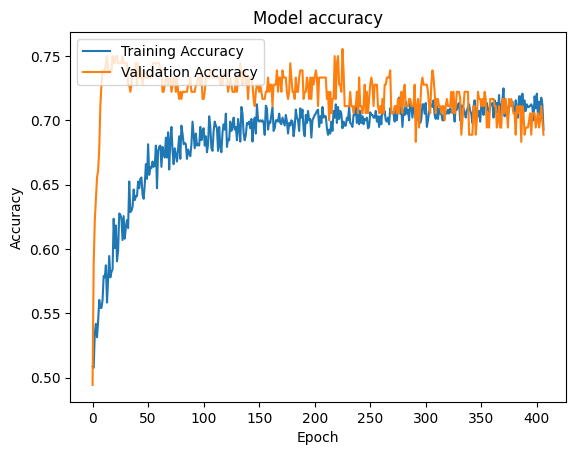

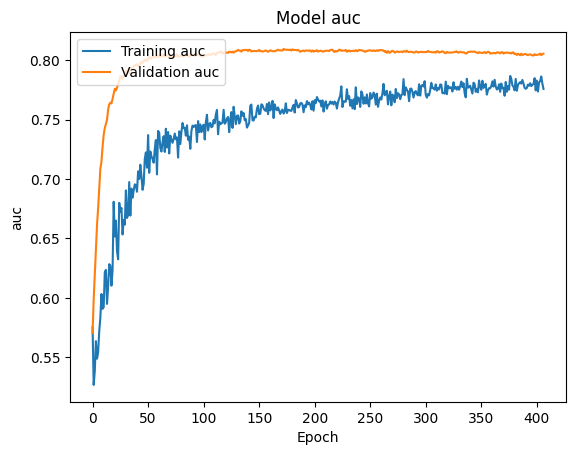

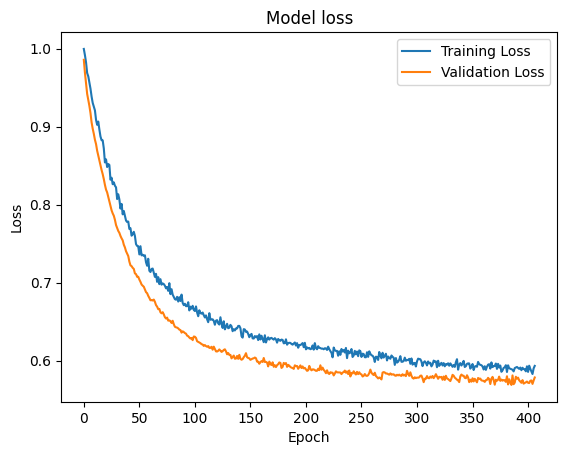

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


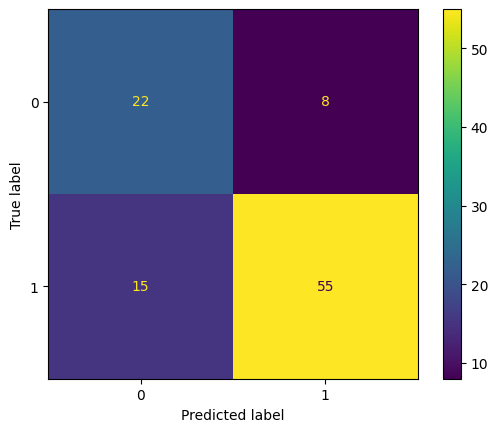

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5938 - auc: 0.7846 - balanced_accuracy: 0.5241 - f1_score: 0.7307 - loss: 1.0206 - precision_1: 0.8687
Epoch 1: val_loss improved from inf to 1.06428, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4888 - auc: 0.6127 - balanced_accuracy: 0.5266 - f1_score: 0.7307 - loss: 1.0443 - precision_1: 0.7286 - val_accuracy: 0.3111 - val_auc: 0.5046 - val_balanced_accuracy: 0.5017 - val_f1_score: 0.7307 - val_loss: 1.0643 - val_precision_1: 1.0000
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5625 - auc: 0.3979 - balanced_accuracy: 0.5000 - f1_score: 0.7307 - loss: 1.0080 - precision_1: 0.3333
Epoch 2: val_loss improved from 1.06428 to 1.03550, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4736 - auc: 0.4385 - balanced_accuracy: 0.4985 - f1_score: 0.7306 - loss: 1.0355 - precision_1: 0.4438 - val_accuracy: 0.3444 - 

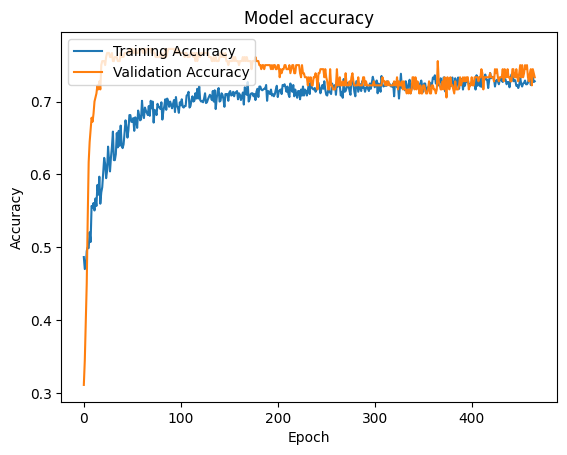

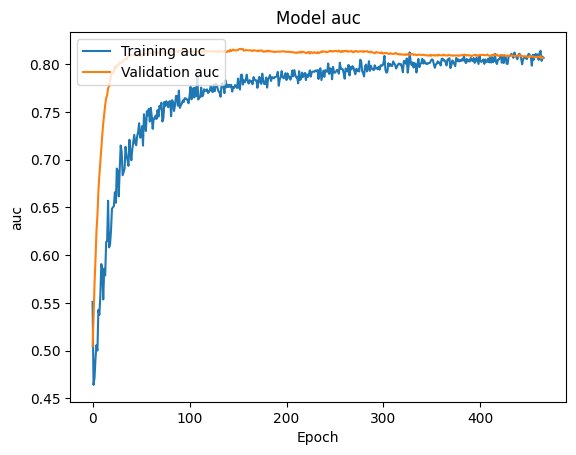

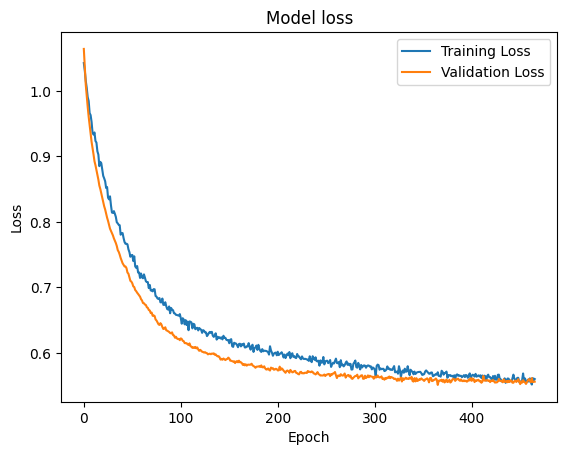

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


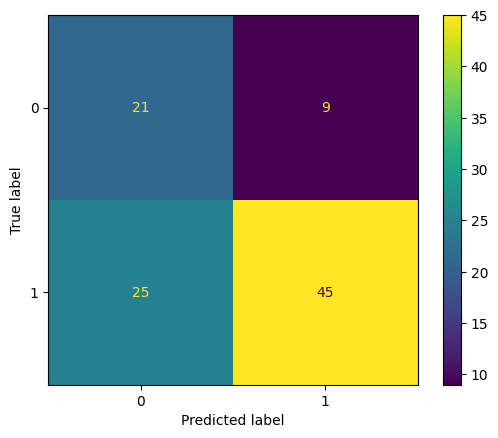

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1:02 2s/step - accuracy: 0.5938 - auc: 0.7827 - balanced_accuracy: 0.5133 - f1_score: 0.7309 - loss: 1.0041 - precision_1: 0.8475
Epoch 1: val_loss improved from inf to 1.00401, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5138 - auc: 0.6247 - balanced_accuracy: 0.5140 - f1_score: 0.7309 - loss: 1.0123 - precision_1: 0.6654 - val_accuracy: 0.4889 - val_auc: 0.5644 - val_balanced_accuracy: 0.4959 - val_f1_score: 0.7308 - val_loss: 1.0040 - val_precision_1: 0.7656
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3438 - auc: 0.3295 - balanced_accuracy: 0.5000 - f1_score: 0.7308 - loss: 1.0482 - precision_1: 0.5333
Epoch 2: val_loss improved from 1.00401 to 0.98368, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4831 - auc: 0.4943 - balanced_accuracy: 0.5035 - f1_score: 0.7308 - loss: 1.0071 - precision_1: 0.5225 - val_accuracy: 0.5778 -

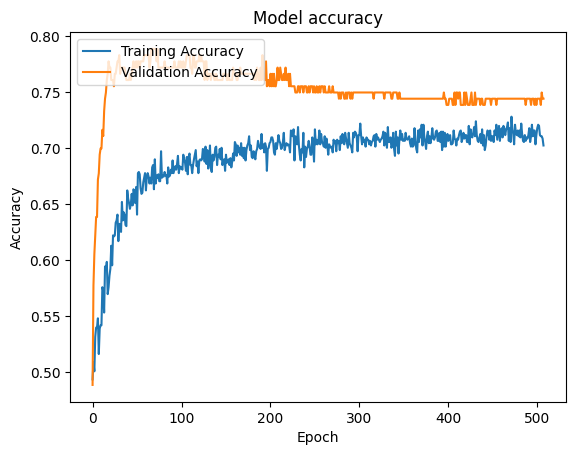

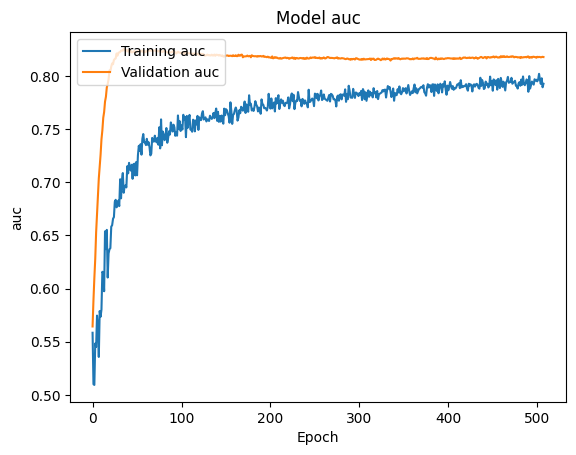

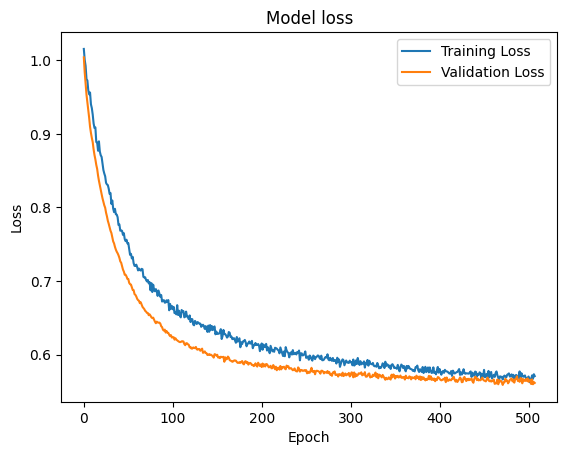

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


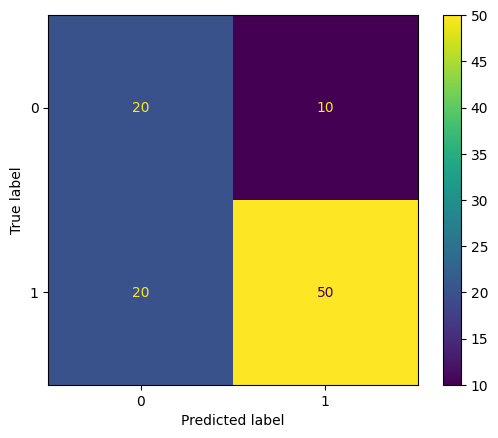

Average Accuracy: 0.7130000054836273
Standard Deviation of CV accuracy:  0.04859011352768675
Average Precision: 0.8515928506851196
Standard Deviation of CV precision:  0.03413523964052514
Average Balanced accuracy: 0.6076221287250518
Standard Deviation of CV Balanced accuracy5tlor49:  0.03823879884375703
Average F1-Score: 0.8162268996238708
Standard Deviation of CV F1:  0.03818670747166821
Average ROC-AUC: 0.780309510231018
Standard Deviation of CV roc_auc:  0.0556664272777454


In [30]:
adasyn = ADASYN(random_state=42)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize metrics lists
accuracies_1 = []
precisions_1 = []
# recalls = []
f1_scores_1 = []
roc_aucs_1 = []
# true_negatives = []
balance_accuracies_1 = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(t_X, Y):
    X_train, X_test = t_X[train_index], t_X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=200)

    adam1_5 = keras.optimizers.Adam(learning_rate=0.0001)

    model1_5 = model.model1(optimizer=adam1_5, metric=metrics, loss=loss)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

    early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.002,
    patience=100,
    verbose=1,
    mode="min",
    )

    checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model\\best_model_01.keras',
    monitor= "val_loss",
    verbose=1,
    mode="min",
    save_best_only=True,  # Save only the best model based on the monitored metric
    save_weights_only=False,  # Save the full model (set to True to save only the weights)
    save_freq='epoch'  # Save the model at the end of every epoch
    )
    

    history = model1_5.fit(X_adasyn, y_adasyn, epochs=600, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

    best_model_1 = load_model('model\\best_model_01.keras')

    loss_and_metrics = best_model_1.evaluate(X_test, y_test)
    print(loss_and_metrics)
    print('Loss = ',loss_and_metrics[0])
    accuracies_1.append(loss_and_metrics[1])
    precisions_1.append(loss_and_metrics[2])
    # recalls.append(loss_and_metrics[3])
    balance_accuracies_1.append(loss_and_metrics[3])
    f1_scores_1.append(loss_and_metrics[4])
    roc_aucs_1.append(loss_and_metrics[5])
    # true_negatives.append(loss_and_metrics[6])
    

    plot.plotAccuracy(history)
    plot.plotAUC(history)

    plot.plotLoss(history)

    plot.plotConfusionMatrix(model= model1_5, X_test=X_test, y_test=y_test)

# Calculate the average of the metrics
average_accuracy = np.mean(accuracies_1)
average_precision = np.mean(precisions_1) 
# average_recall = np.mean(recalls)
average_B_accuracy = np.mean(balance_accuracies_1)
average_f1_score = np.mean(f1_scores_1)
average_roc_auc = np.mean(roc_aucs_1)
# average_true_negative = np.mean(true_negatives)


# Display the metrics
print(f"Average Accuracy: {average_accuracy}")
print("Standard Deviation of CV accuracy: ", np.std(accuracies_1))
print(f"Average Precision: {average_precision}")
print("Standard Deviation of CV precision: ", np.std(precisions_1))
# print(f"Average Recall: {average_recall}")
# print("Standard Deviation of CV recall: ", np.std(recalls))
print(f"Average Balanced accuracy: {average_B_accuracy}")
print("Standard Deviation of CV Balanced accuracy5tlor49: ", np.std(balance_accuracies_1))
print(f"Average F1-Score: {average_f1_score}")
print("Standard Deviation of CV F1: ", np.std(f1_scores_1))
print(f"Average ROC-AUC: {average_roc_auc}")
print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_1))
# print(f"Average true negative: {average_true_negative}")
# print("Standard Deviation of CV true_negative: ", np.std(true_negatives))

## Model 2 layers

In [31]:
# adam2 = keras.optimizers.Adam(learning_rate=0.0001)

In [32]:
# model2 = model.model2(optimizer= adam2, metric= metrics)

In [33]:
# model2.summary()

In [34]:
# kf = KFold(n_splits=10, shuffle=True, random_state=42)


# # Initialize metrics lists
# accuracies = []
# precisions = []
# # recalls = []
# f1_scores = []
# roc_aucs = []
# # true_negatives = []
# balance_accuracies = []
# confusion_matrices = []

# # Perform KFold cross-validation
# for train_index, test_index in kf.split(t_X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     model2.fit(X_train, y_train, epochs=100)

#     loss_and_metrics = model2.evaluate(X_test, y_test)
#     print(loss_and_metrics)
#     print('Loss = ',loss_and_metrics[0])
#     accuracies.append(loss_and_metrics[1])
#     precisions.append(loss_and_metrics[2])
#     # recalls.append(loss_and_metrics[3])
#     balance_accuracies.append(loss_and_metrics[3])
#     f1_scores.append(loss_and_metrics[4])
#     roc_aucs.append(loss_and_metrics[5])
#     # true_negatives.append(loss_and_metrics[6])
    


#     predicted = model2.predict(X_test)
#     predicted = tf.squeeze(predicted)
#     predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
#     actual = np.array(y_test)
#     conf_mat = confusion_matrix(actual, predicted)
#     displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
#     displ.plot()


# # Calculate the average of the metrics
# average_accuracy = np.mean(accuracies)
# average_precision = np.mean(precisions)
# # average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies)
# average_f1_score = np.mean(f1_scores)
# average_roc_auc = np.mean(roc_aucs)
# # average_true_negative = np.mean(true_negatives)


# # Display the metrics
# print(f"Average Accuracy: {average_accuracy}")
# print("Standard Deviation of CV accuracy: ", np.std(accuracies))
# print(f"Average Precision: {average_precision}")
# print("Standard Deviation of CV precision: ", np.std(precisions))
# # print(f"Average Recall: {average_recall}")
# # print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV recall: ", np.std(balance_accuracies))
# print(f"Average F1-Score: {average_f1_score}")
# print("Standard Deviation of CV F1: ", np.std(f1_scores))
# print(f"Average ROC-AUC: {average_roc_auc}")
# print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs))
# # print(f"Average true negative: {average_true_negative}")
# # print("Standard Deviation of CV true_negative: ", np.std(true_negatives))

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3750 - auc: 0.7715 - balanced_accuracy: 0.5044 - f1_score: 0.7303 - loss: 1.6794 - precision_1: 0.8115
Epoch 1: val_loss improved from inf to 1.59429, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4950 - auc: 0.6186 - balanced_accuracy: 0.4983 - f1_score: 0.7303 - loss: 1.6515 - precision_1: 0.6260 - val_accuracy: 0.6278 - val_auc: 0.5660 - val_balanced_accuracy: 0.5001 - val_f1_score: 0.7303 - val_loss: 1.5943 - val_precision_1: 0.6901
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3750 - auc: 0.2863 - balanced_accuracy: 0.5000 - f1_score: 0.7303 - loss: 1.7095 - precision_1: 0.4211
Epoch 2: val_loss improved from 1.59429 to 1.57206, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5248 - auc: 0.5076 - balanced_accuracy: 0.5058 - f1_score: 0.7303 - loss: 1.6264 - precision_1: 0.5425 - val_accuracy: 0.6444 - 

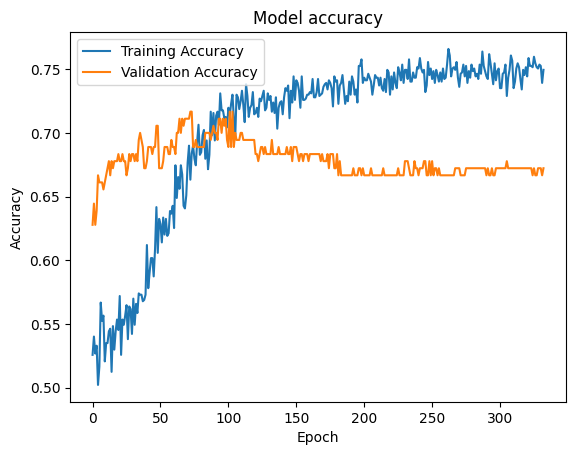

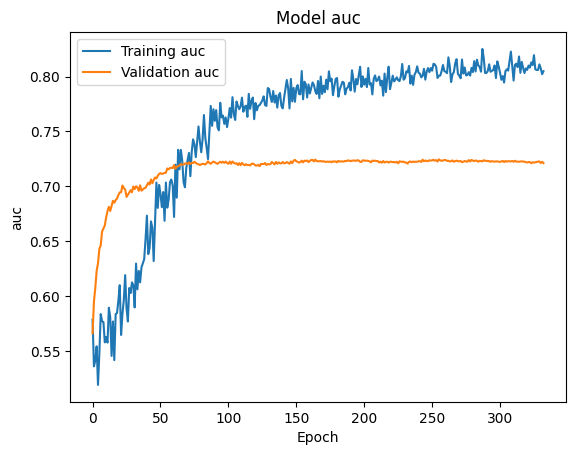

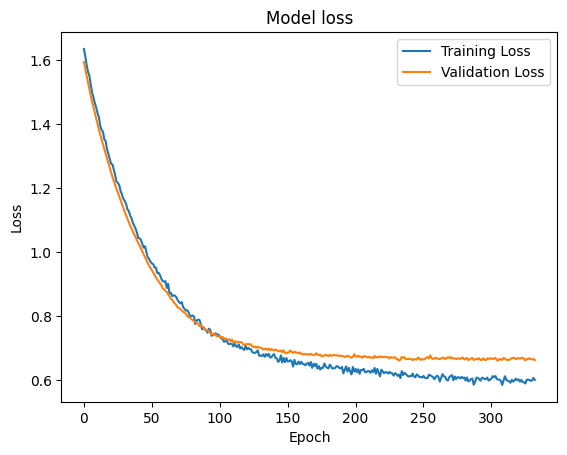

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


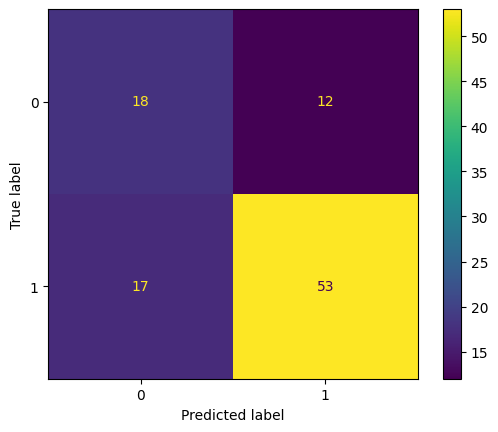

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5312 - auc: 0.6841 - balanced_accuracy: 0.4899 - f1_score: 0.7302 - loss: 1.7051 - precision_1: 0.7480
Epoch 1: val_loss improved from inf to 1.59749, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4928 - auc: 0.5748 - balanced_accuracy: 0.4889 - f1_score: 0.7302 - loss: 1.6747 - precision_1: 0.5838 - val_accuracy: 0.7056 - val_auc: 0.4763 - val_balanced_accuracy: 0.4998 - val_f1_score: 0.7301 - val_loss: 1.5975 - val_precision_1: 0.7209
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5312 - auc: 0.5437 - balanced_accuracy: 0.5000 - f1_score: 0.7301 - loss: 1.6187 - precision_1: 0.6316
Epoch 2: val_loss improved from 1.59749 to 1.58098, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - auc: 0.5017 - balanced_accuracy: 0.4977 - f1_score: 0.7301 - loss: 1.6449 - precision_1: 0.5245 - val_accuracy: 0.7056 - 

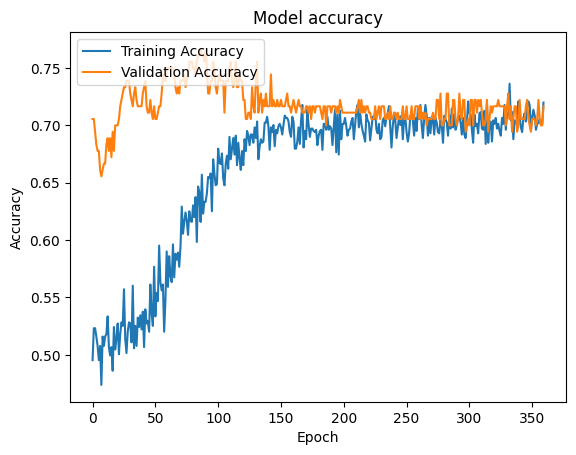

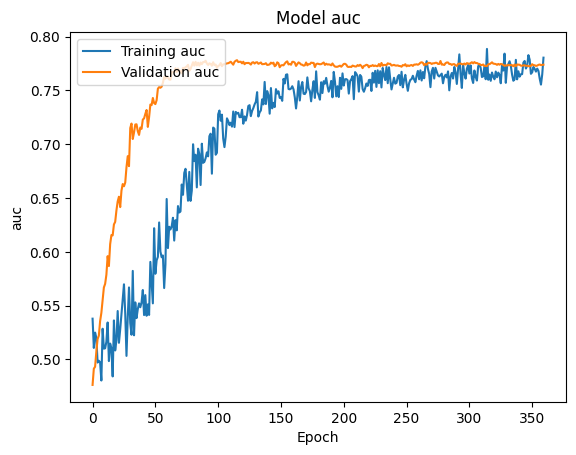

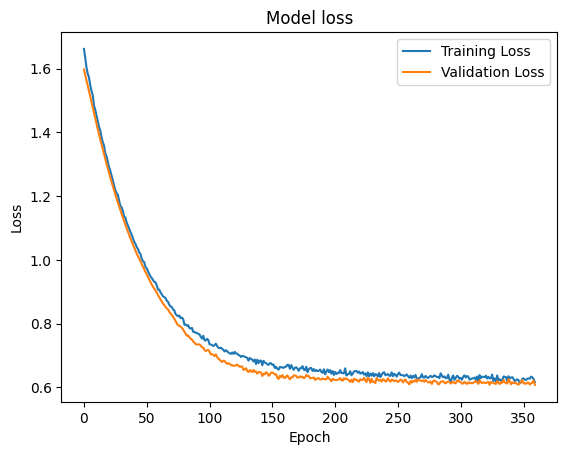

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


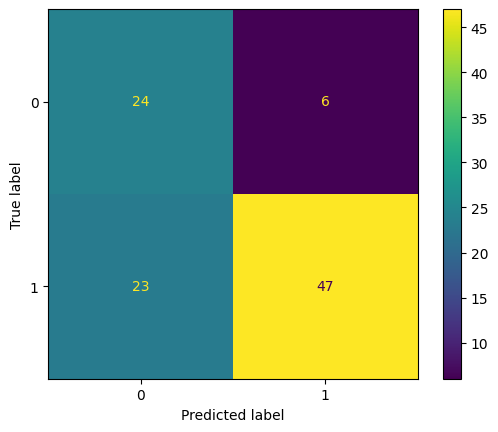

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6562 - auc: 0.7560 - balanced_accuracy: 0.4979 - f1_score: 0.7282 - loss: 1.6071 - precision_1: 0.8385
Epoch 1: val_loss improved from inf to 1.61384, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5269 - auc: 0.6222 - balanced_accuracy: 0.4896 - f1_score: 0.7282 - loss: 1.6411 - precision_1: 0.6268 - val_accuracy: 0.5722 - val_auc: 0.5163 - val_balanced_accuracy: 0.4998 - val_f1_score: 0.7282 - val_loss: 1.6138 - val_precision_1: 0.6769
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - auc: 0.4615 - balanced_accuracy: 0.5000 - f1_score: 0.7282 - loss: 1.6281 - precision_1: 0.5833
Epoch 2: val_loss improved from 1.61384 to 1.59225, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4995 - auc: 0.5185 - balanced_accuracy: 0.4993 - f1_score: 0.7282 - loss: 1.6241 - precision_1: 0.5004 - val_accuracy: 0.5611 - 

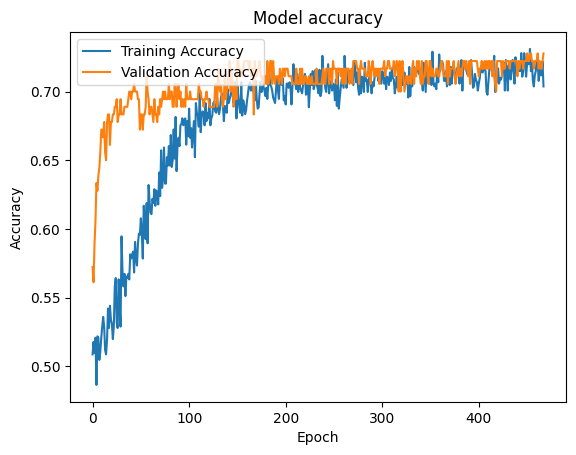

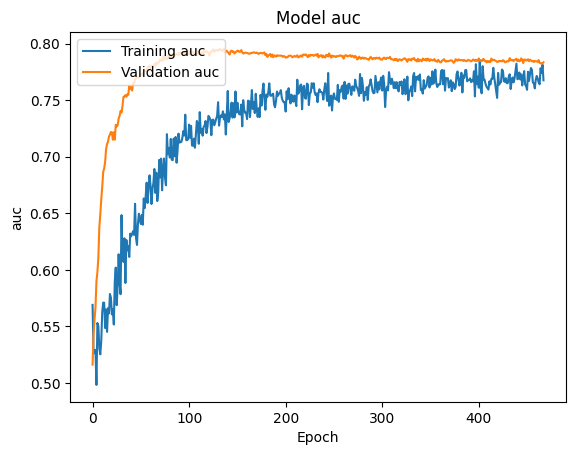

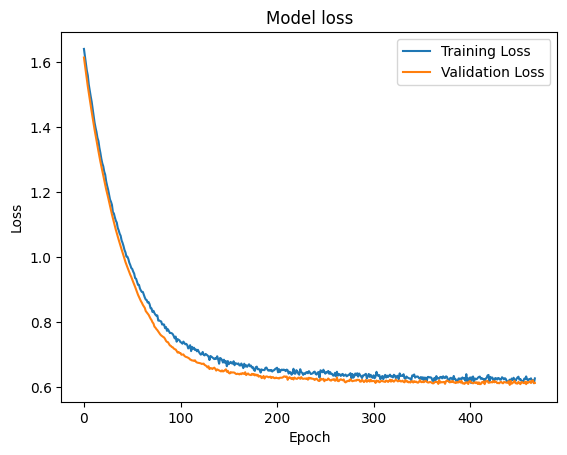

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


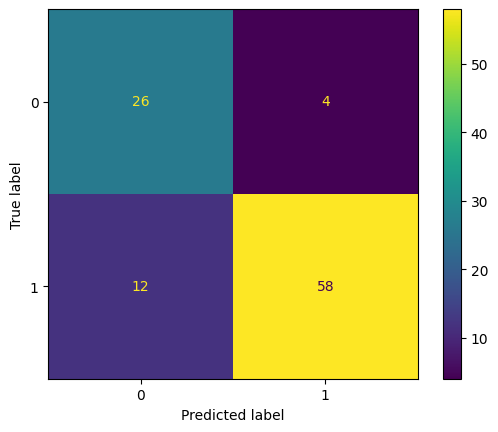

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.4062 - auc: 0.7505 - balanced_accuracy: 0.5080 - f1_score: 0.7265 - loss: 1.7251 - precision_1: 0.8364
Epoch 1: val_loss improved from inf to 1.66265, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4954 - auc: 0.6274 - balanced_accuracy: 0.5161 - f1_score: 0.7265 - loss: 1.6773 - precision_1: 0.6977 - val_accuracy: 0.3278 - val_auc: 0.4174 - val_balanced_accuracy: 0.5001 - val_f1_score: 0.7264 - val_loss: 1.6626 - val_precision_1: 0.5000
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4375 - auc: 0.2549 - balanced_accuracy: 0.5000 - f1_score: 0.7264 - loss: 1.7121 - precision_1: 0.4000
Epoch 2: val_loss improved from 1.66265 to 1.63353, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4848 - auc: 0.4660 - balanced_accuracy: 0.4984 - f1_score: 0.7264 - loss: 1.6580 - precision_1: 0.4893 - val_accuracy: 0.3500 - 

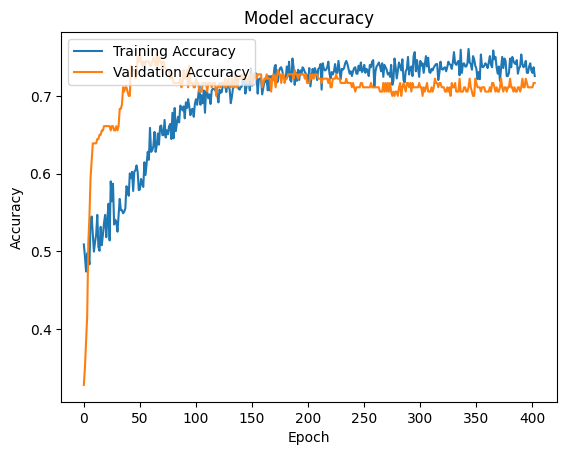

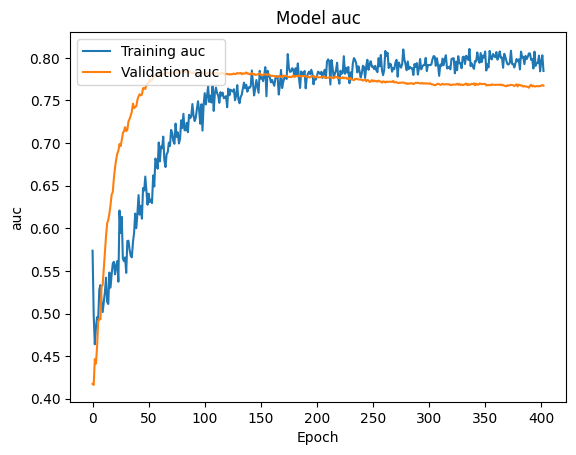

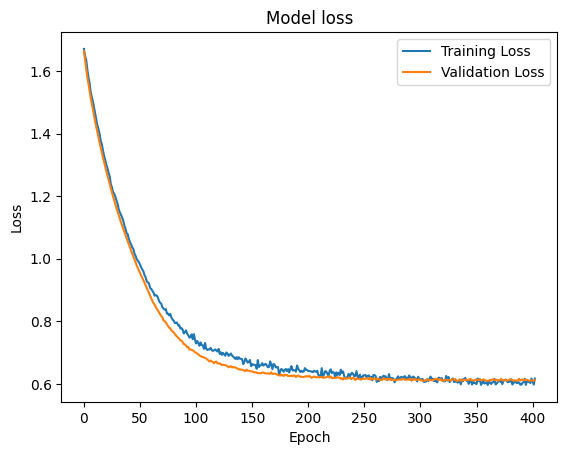

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


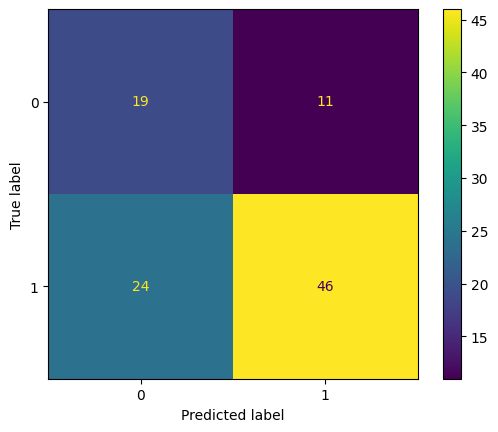

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4375 - auc: 0.7466 - balanced_accuracy: 0.5033 - f1_score: 0.7265 - loss: 1.6470 - precision_1: 0.8120
Epoch 1: val_loss improved from inf to 1.61572, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4634 - auc: 0.5929 - balanced_accuracy: 0.5074 - f1_score: 0.7265 - loss: 1.6684 - precision_1: 0.6240 - val_accuracy: 0.5611 - val_auc: 0.4925 - val_balanced_accuracy: 0.5034 - val_f1_score: 0.7265 - val_loss: 1.6157 - val_precision_1: 0.6772
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6250 - auc: 0.6098 - balanced_accuracy: 0.5000 - f1_score: 0.7265 - loss: 1.6286 - precision_1: 0.5882
Epoch 2: val_loss improved from 1.61572 to 1.59505, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5103 - auc: 0.4817 - balanced_accuracy: 0.4994 - f1_score: 0.7265 - loss: 1.6450 - precision_1: 0.5189 - val_accuracy: 0.5778 - 

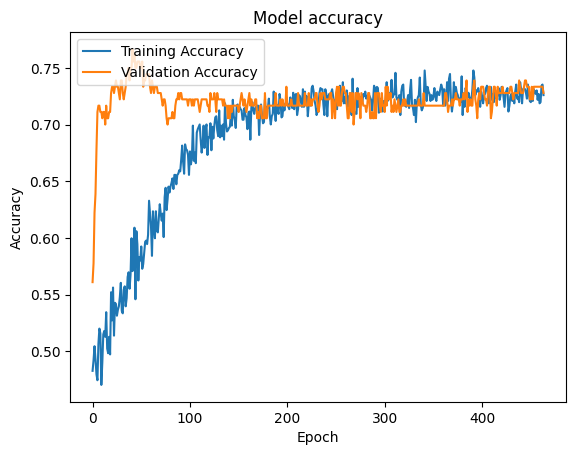

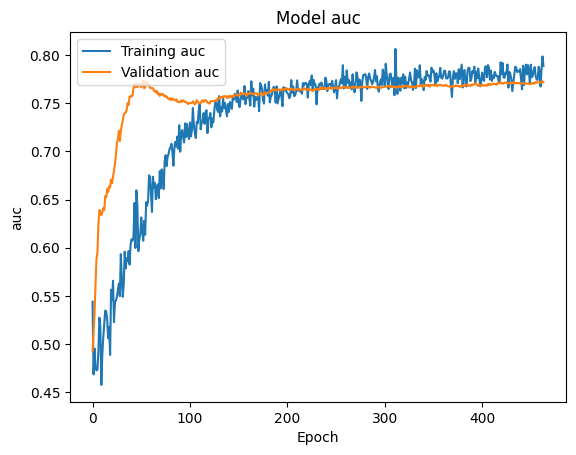

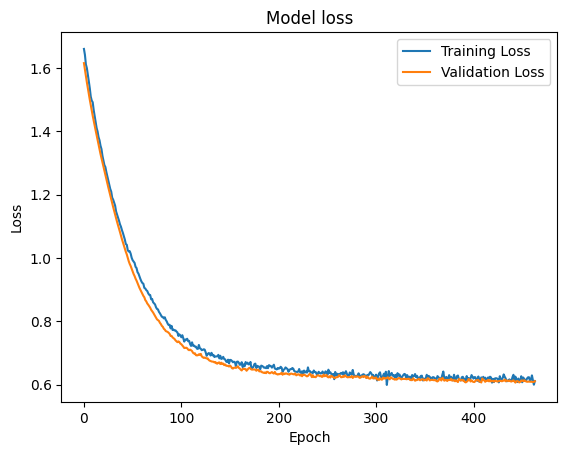

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


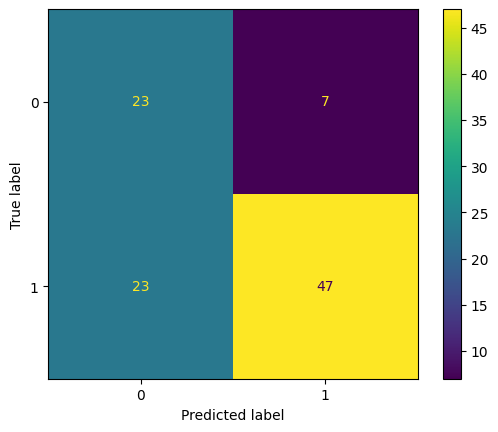

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4375 - auc: 0.7513 - balanced_accuracy: 0.5203 - f1_score: 0.7264 - loss: 1.6458 - precision_1: 0.7983
Epoch 1: val_loss improved from inf to 1.64888, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5029 - auc: 0.6261 - balanced_accuracy: 0.5296 - f1_score: 0.7264 - loss: 1.6452 - precision_1: 0.7047 - val_accuracy: 0.2944 - val_auc: 0.6213 - val_balanced_accuracy: 0.5003 - val_f1_score: 0.7264 - val_loss: 1.6489 - val_precision_1: 0.0000e+00
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5312 - auc: 0.5891 - balanced_accuracy: 0.5000 - f1_score: 0.7264 - loss: 1.6281 - precision_1: 0.7500
Epoch 2: val_loss improved from 1.64888 to 1.61685, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4857 - auc: 0.4933 - balanced_accuracy: 0.5024 - f1_score: 0.7264 - loss: 1.6308 - precision_1: 0.5434 - val_accuracy: 0.300

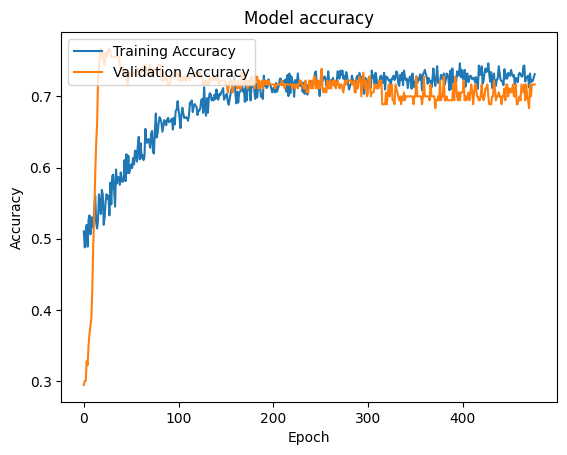

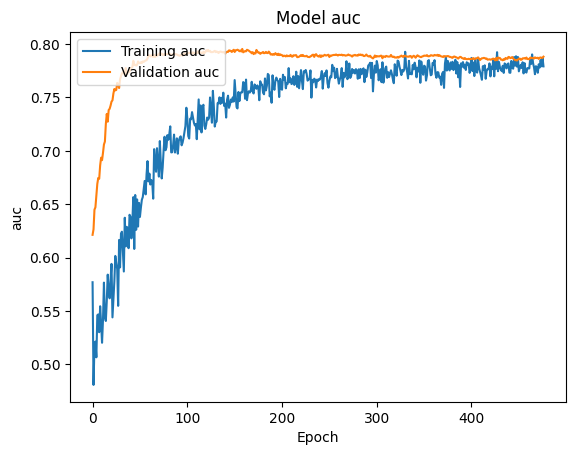

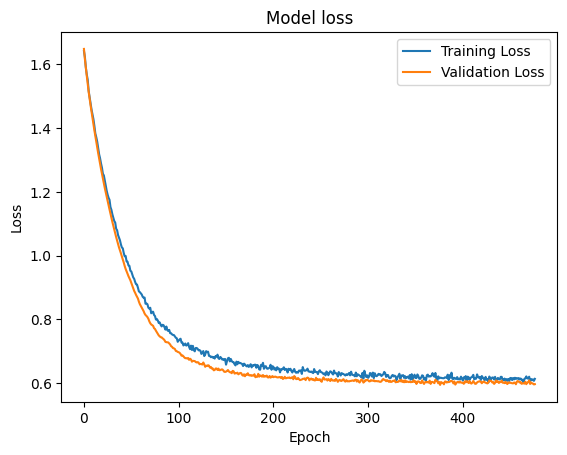

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


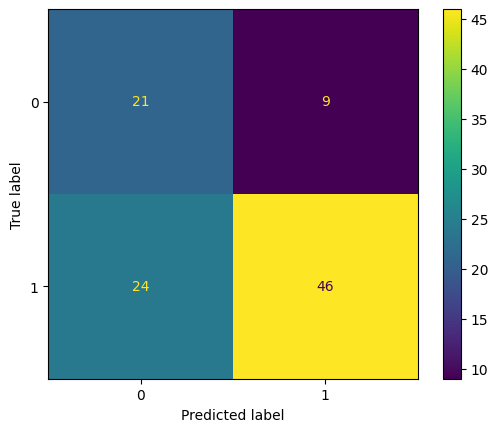

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.3750 - auc: 0.7454 - balanced_accuracy: 0.5164 - f1_score: 0.7255 - loss: 1.8409 - precision_1: 0.8378
Epoch 1: val_loss improved from inf to 1.70715, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4717 - auc: 0.6022 - balanced_accuracy: 0.5258 - f1_score: 0.7255 - loss: 1.7251 - precision_1: 0.6957 - val_accuracy: 0.2889 - val_auc: 0.3887 - val_balanced_accuracy: 0.4997 - val_f1_score: 0.7255 - val_loss: 1.7071 - val_precision_1: 0.4000
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - auc: 0.4750 - balanced_accuracy: 0.5000 - f1_score: 0.7255 - loss: 1.6266 - precision_1: 0.3000
Epoch 2: val_loss improved from 1.70715 to 1.65913, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4672 - auc: 0.4723 - balanced_accuracy: 0.4950 - f1_score: 0.7255 - loss: 1.6753 - precision_1: 0.4528 - val_accuracy: 0.2889 - 

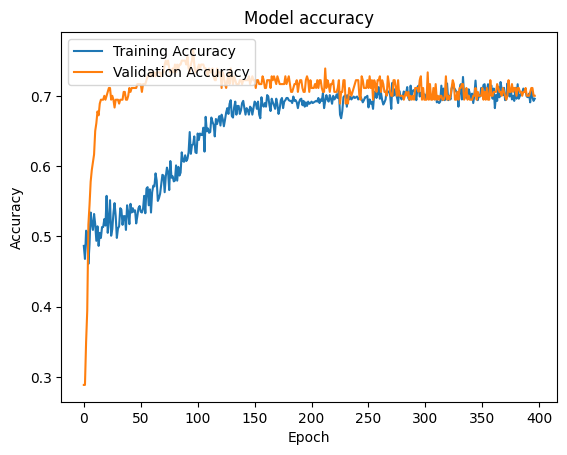

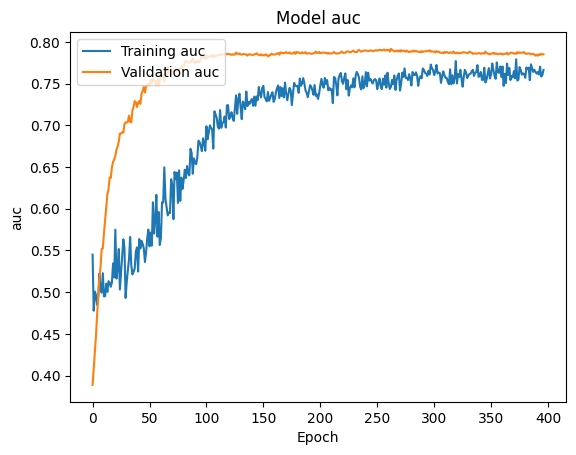

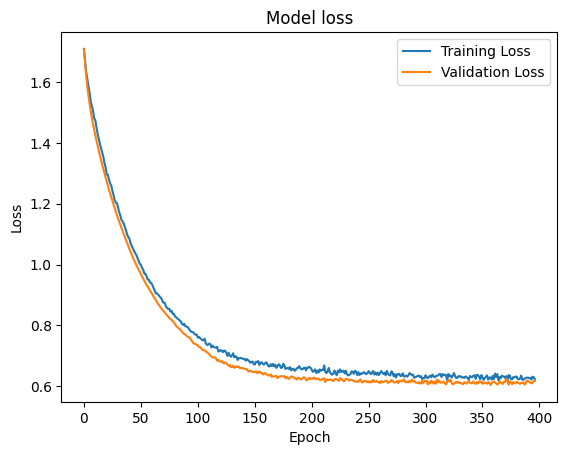

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


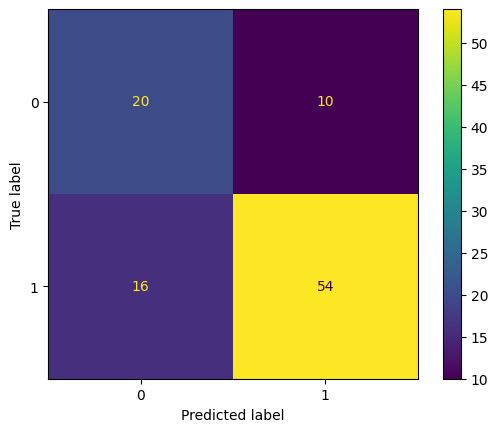

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6562 - auc: 0.7617 - balanced_accuracy: 0.5013 - f1_score: 0.7243 - loss: 1.6101 - precision_1: 0.8475
Epoch 1: val_loss improved from inf to 1.58632, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5081 - auc: 0.5950 - balanced_accuracy: 0.4980 - f1_score: 0.7243 - loss: 1.6428 - precision_1: 0.6305 - val_accuracy: 0.6167 - val_auc: 0.5470 - val_balanced_accuracy: 0.5036 - val_f1_score: 0.7243 - val_loss: 1.5863 - val_precision_1: 0.6753
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - auc: 0.4549 - balanced_accuracy: 0.5000 - f1_score: 0.7243 - loss: 1.6485 - precision_1: 0.5294
Epoch 2: val_loss improved from 1.58632 to 1.56462, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5030 - auc: 0.5027 - balanced_accuracy: 0.4984 - f1_score: 0.7242 - loss: 1.6158 - precision_1: 0.5263 - val_accuracy: 0.6222 - 

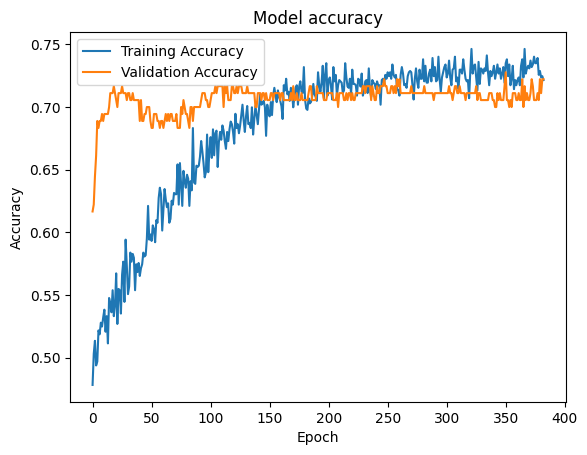

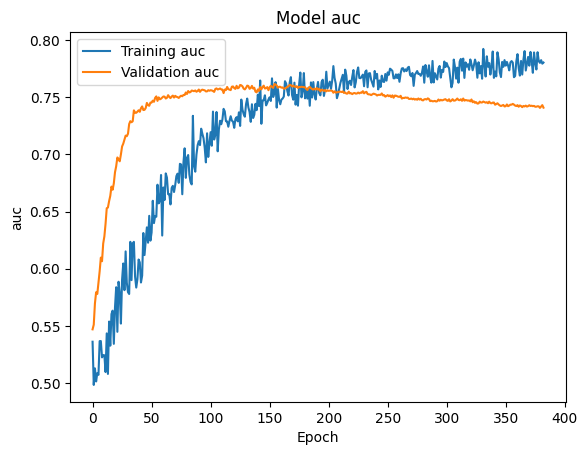

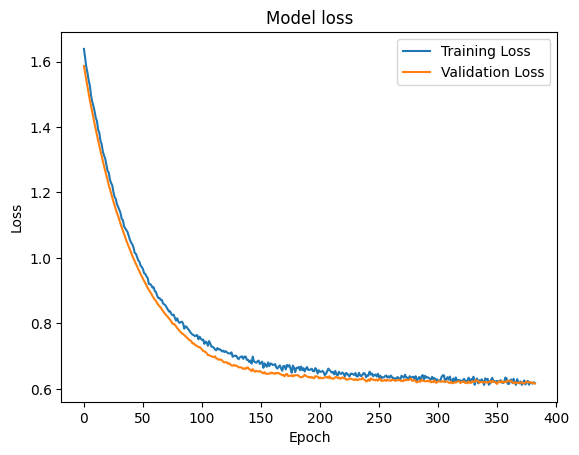

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


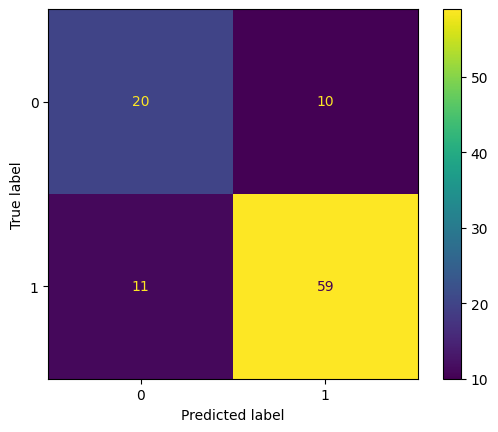

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4062 - auc: 0.7147 - balanced_accuracy: 0.5152 - f1_score: 0.7245 - loss: 1.7168 - precision_1: 0.7829
Epoch 1: val_loss improved from inf to 1.66712, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4741 - auc: 0.5967 - balanced_accuracy: 0.5161 - f1_score: 0.7244 - loss: 1.6755 - precision_1: 0.6589 - val_accuracy: 0.3333 - val_auc: 0.3972 - val_balanced_accuracy: 0.5001 - val_f1_score: 0.7244 - val_loss: 1.6671 - val_precision_1: 0.7500
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4375 - auc: 0.5526 - balanced_accuracy: 0.5000 - f1_score: 0.7244 - loss: 1.6178 - precision_1: 0.5556
Epoch 2: val_loss improved from 1.66712 to 1.63737, saving model to model\best_model_02.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4951 - auc: 0.4906 - balanced_accuracy: 0.4977 - f1_score: 0.7244 - loss: 1.6404 - precision_1: 0.5374 - val_accuracy: 0.3611 - 

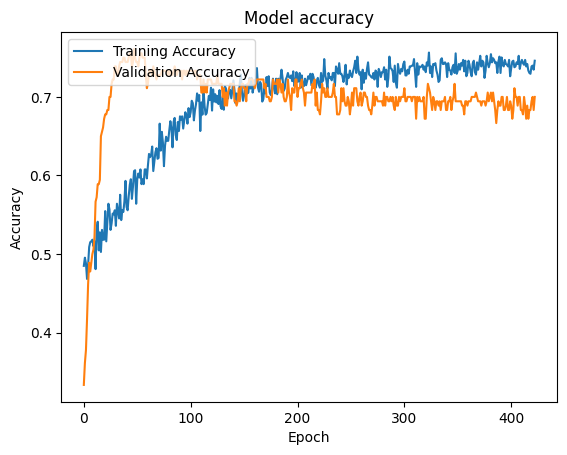

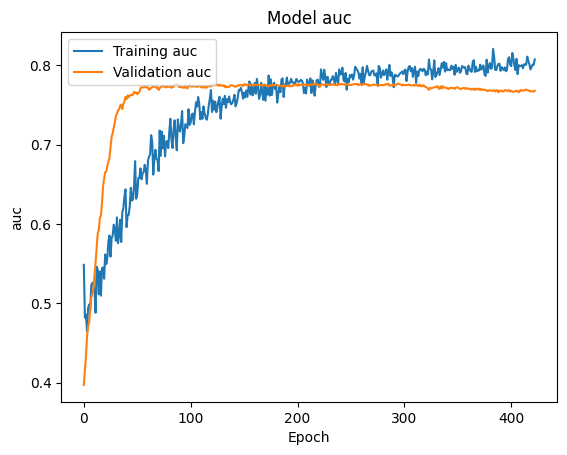

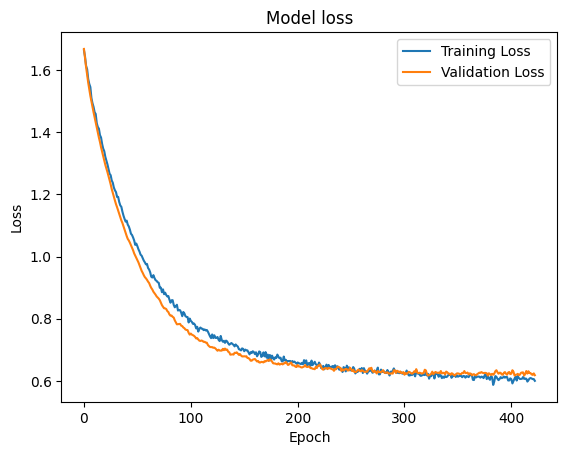

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


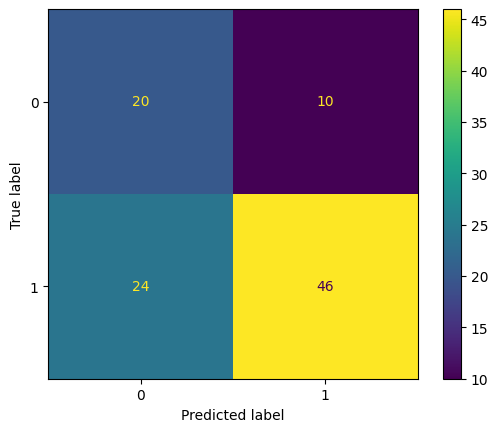

Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5312 - auc: 0.7330 - balanced_accuracy: 0.4876 - f1_score: 0.7244 - loss: 1.6518 - precision_1: 0.7704
Epoch 1: val_loss improved from inf to 1.60824, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4848 - auc: 0.6088 - balanced_accuracy: 0.4807 - f1_score: 0.7244 - loss: 1.6623 - precision_1: 0.5690 - val_accuracy: 0.6944 - val_auc: 0.4458 - val_balanced_accuracy: 0.5000 - val_f1_score: 0.7244 - val_loss: 1.6082 - val_precision_1: 0.6944
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.5312 - auc: 0.4979 - balanced_accuracy: 0.5000 - f1_score: 0.7244 - loss: 1.6020 - precision_1: 0.6087
Epoch 2: val_loss improved from 1.60824 to 1.58730, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4869 - auc: 0.5084 - balanced_accuracy: 0.4923 - f1_score: 0.7244 - loss: 1.6326 - precision_1: 0.4902 - val_accuracy: 0.6889 -

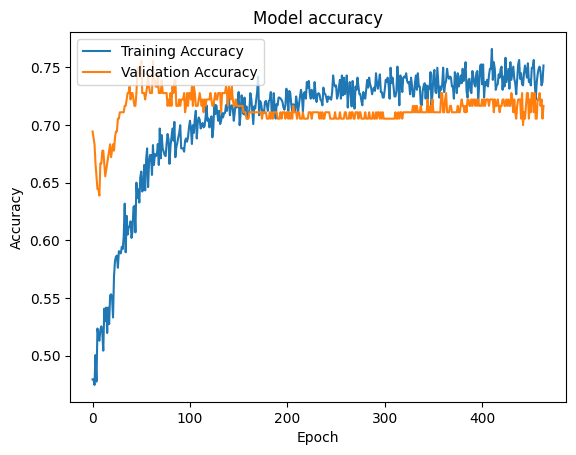

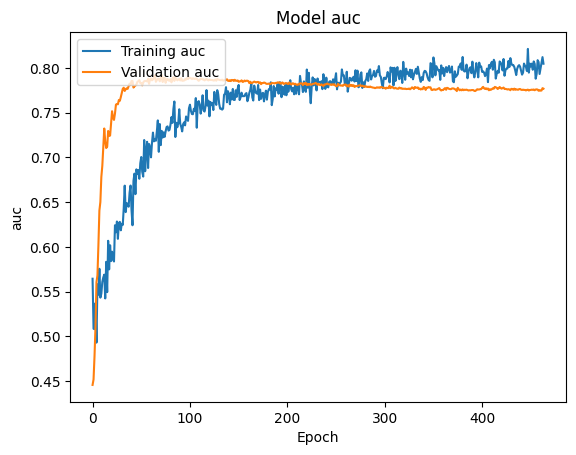

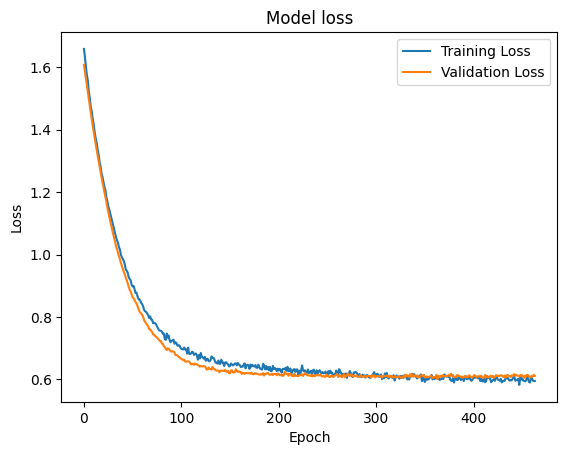

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


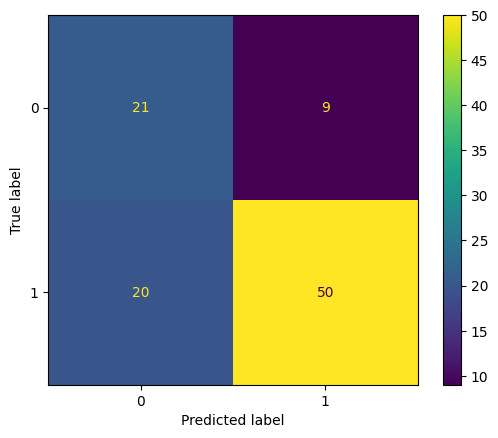

Average Accuracy: 0.722000002861023
Standard Deviation of CV accuracy:  0.060299246435695994
Average Precision: 0.8471873044967652
Standard Deviation of CV precision:  0.039411764249055445
Average Balanced accuracy: 0.6104241192340851
Standard Deviation of CV Balanced accuracy:  0.03160958312392068
Average F1-Score: 0.831309688091278
Standard Deviation of CV F1:  0.04928310569374115
Average ROC-AUC: 0.7786428511142731
Standard Deviation of CV roc_auc:  0.05543490953637068


In [35]:
adasyn = ADASYN(random_state=42)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize metrics lists
accuracies_2 = []
precisions_2 = []
# recalls = []
f1_scores_2 = []
roc_aucs_2 = []
# true_negatives = []
balance_accuracies_2 = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(t_X, Y):
    X_train, X_test = t_X[train_index], t_X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=200)

    adam2_5 = keras.optimizers.Adam(learning_rate=0.0001)

    model2_5 = model.model2(optimizer=adam2_5, metric=metrics, loss=loss)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

    # early_stopping = Stop_AL.EarlyStopAccLoss(
    # min_delta=0.001,
    # min_delta_loss = 0.01,
    # patience_auc=100,
    # verbose=1,
    # )

    # checkpoint = Checkpoint_A.CheckpointBestAUC(min_delta_loss = 0.01)

    early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.002,
    patience=100,
    verbose=1,
    mode="min",
    )

    checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model\\best_model_02.keras',
    monitor= "val_loss",
    verbose=1,
    mode="min",
    save_best_only=True,  # Save only the best model based on the monitored metric
    save_weights_only=False,  # Save the full model (set to True to save only the weights)
    save_freq='epoch'  # Save the model at the end of every epoch
    )
    

    
    history = model2_5.fit(X_adasyn, y_adasyn, epochs=600, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

    best_model_2 = load_model('model\\best_model_02.keras')

    loss_and_metrics = best_model_2.evaluate(X_test, y_test)
    print(loss_and_metrics)
    print('Loss = ',loss_and_metrics[0])
    accuracies_2.append(loss_and_metrics[1])
    precisions_2.append(loss_and_metrics[2])
    # recalls.append(loss_and_metrics[3])
    balance_accuracies_2.append(loss_and_metrics[3])
    f1_scores_2.append(loss_and_metrics[4])
    roc_aucs_2.append(loss_and_metrics[5])
    # true_negatives.append(loss_and_metrics[6])
    

    plot.plotAccuracy(history)
    plot.plotAUC(history)
    plot.plotLoss(history)

    plot.plotConfusionMatrix(model= model2_5, X_test=X_test, y_test=y_test)


# Calculate the average of the metrics
average_accuracy = np.mean(accuracies_2)
average_precision = np.mean(precisions_2)
# average_recall = np.mean(recalls)
average_B_accuracy = np.mean(balance_accuracies_2)
average_f1_score = np.mean(f1_scores_2)
average_roc_auc = np.mean(roc_aucs_2)
# average_true_negative = np.mean(true_negatives)


# Display the metrics
print(f"Average Accuracy: {average_accuracy}")
print("Standard Deviation of CV accuracy: ", np.std(accuracies_2))
print(f"Average Precision: {average_precision}")
print("Standard Deviation of CV precision: ", np.std(precisions_2))
# print(f"Average Recall: {average_recall}")
# print("Standard Deviation of CV recall: ", np.std(recalls))
print(f"Average Balanced accuracy: {average_B_accuracy}")
print("Standard Deviation of CV Balanced accuracy: ", np.std(balance_accuracies_2))
print(f"Average F1-Score: {average_f1_score}")
print("Standard Deviation of CV F1: ", np.std(f1_scores_2))
print(f"Average ROC-AUC: {average_roc_auc}")
print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_2))
# print(f"Average true negative: {average_true_negative}")
# print("Standard Deviation of CV true_negative: ", np.std(true_negatives))